# Unique Name Generator

## Importing all required Libraries

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model,Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,Input
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import Regularizer
import tensorflow.keras.utils as ku
%matplotlib inline
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

## Loading Male and Female Data

In [2]:
data=pd.read_csv("C:/Users/saura/Desktop/Girl_name.csv")

In [3]:
data1=pd.read_csv("C:/Users/saura/Downloads/archive/Dataset-Indian-Names-master/Indian-Male-Names.csv")

In [4]:
data1=data1.loc[:,'name']

## Preprocessing the male data

In [5]:
data1.isnull().sum()

24

In [6]:
data1=data1.dropna()

In [7]:
data.head()

,Girl
0,shivani
1,isha
2,divya
3,mansi
4,mazida


In [8]:
# Function to Clean data

def clean(data):
    data=[i.split()[0].lower() for i in data]
    data=[i for i in data if i.isalpha()]
    data=set(data)
    corp=[]
    for i in data:
        if(len(i)<=10 and len(i)>3):
            corp.append(i+'\n')
    return corp

## Extracting all the cleaned data

In [9]:
corp=clean(data['Girl'])

In [10]:
corp_m=clean(data1)

## Building Dictionaries to map characters to index and vice versa

In [12]:
conv=['\n', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

In [13]:
char_to_i={j:i for i,j in enumerate(conv)}
i_to_char={i:j for i,j in enumerate(conv)}

## Mapping the array of names to the array of indexes

In [14]:
# Helper fuction to map array

def format_it(data):
    corpus=[]
    for i in data:
        z=[]
        for j in range(len(i)): 
            z.append(char_to_i[i[j]])
            corpus.append(z[:])
    return corpus

In [15]:
corpus=format_it(corp)

In [16]:
corpus_m=format_it(corp_m)

## Making Input and Outut array for training the model.

In [17]:
output_arr=np.array(pad_sequences(corpus, maxlen=12, padding='pre'))

In [18]:
output=ku.to_categorical(output_arr[:,-1])

In [19]:
output_arr_m=np.array(pad_sequences(corpus_m, maxlen=12, padding='pre'))

In [20]:
output_m=ku.to_categorical(output_arr_m[:,-1])

In [21]:
input_arr=[]
for i in output_arr:
    arr=[]
    arr.append(0)
    for j in range(11):
        arr.append(i[j])
    input_arr.append(arr[:])

In [22]:
input_arr_m=[]
for i in output_arr_m:
    arr=[]
    arr.append(0)
    for j in range(11):
        arr.append(i[j])
    input_arr_m.append(arr[:])

In [23]:
input_arr=np.array(input_arr)

In [24]:
input_arr_m=np.array(input_arr_m)

In [25]:
# Helper function for One-Hot encoding

def mask(data):
    temp=[]
    t=0
    for i in data:
        zero_m=np.zeros((27))
        if(i==0 and t==0):
            temp.append(zero_m)
        else:
            t=1
            zero_m[i]=1
            temp.append(zero_m[:])
    return temp

In [26]:
input_arr.shape

(21668, 12)

In [27]:
input_arr_m.shape

(27391, 12)

In [28]:
input_=np.zeros((21668, 12,27))
for i in range(21668):
    input_[i]=mask(input_arr[i])
    

In [29]:
input_m=np.zeros((27391, 12,27))
for i in range(27391):
    input_m[i]=mask(input_arr_m[i])
    

## Building the male and female model seperately

In [150]:
model=Sequential([
    Input(shape=(12,27)),
    Bidirectional(LSTM(100,return_sequences=True)),
    Dropout(0.3),
    LSTM(50),
    Dense(13,activation='relu'),
    Dense(27,activation='softmax')
])

In [153]:
model.compile(optimizer='rmsprop',loss='CategoricalCrossentropy',metrics=['accuracy'])

In [154]:
history=model.fit(x=input_,y=output,epochs=150,batch_size=128,verbose=2)

Epoch 1/150
170/170 - 7s - loss: 2.6933 - accuracy: 0.2532
Epoch 2/150
170/170 - 4s - loss: 2.3547 - accuracy: 0.3267
Epoch 3/150
170/170 - 4s - loss: 2.2636 - accuracy: 0.3377
Epoch 4/150
170/170 - 4s - loss: 2.2079 - accuracy: 0.3462
Epoch 5/150
170/170 - 4s - loss: 2.1757 - accuracy: 0.3526
Epoch 6/150
170/170 - 4s - loss: 2.1459 - accuracy: 0.3635
Epoch 7/150
170/170 - 4s - loss: 2.1218 - accuracy: 0.3670
Epoch 8/150
170/170 - 4s - loss: 2.1021 - accuracy: 0.3729
Epoch 9/150
170/170 - 4s - loss: 2.0868 - accuracy: 0.3781
Epoch 10/150
170/170 - 4s - loss: 2.0753 - accuracy: 0.3784
Epoch 11/150
170/170 - 5s - loss: 2.0606 - accuracy: 0.3837
Epoch 12/150
170/170 - 4s - loss: 2.0513 - accuracy: 0.3846
Epoch 13/150
170/170 - 4s - loss: 2.0403 - accuracy: 0.3878
Epoch 14/150
170/170 - 5s - loss: 2.0310 - accuracy: 0.3901
Epoch 15/150
170/170 - 4s - loss: 2.0233 - accuracy: 0.3927
Epoch 16/150
170/170 - 4s - loss: 2.0137 - accuracy: 0.3967
Epoch 17/150
170/170 - 4s - loss: 2.0050 - accura

<AxesSubplot:>

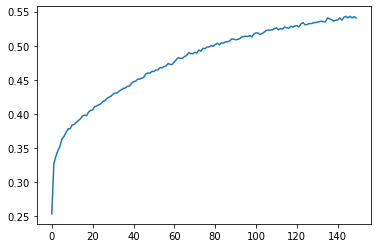

In [156]:
sns.lineplot(x=range(150),y=history.history['accuracy'])

<AxesSubplot:>

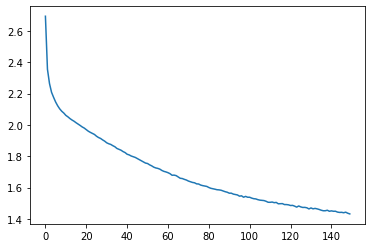

In [157]:
sns.lineplot(x=range(150),y=history.history['loss'])

In [160]:
model_m=Sequential([
    Input(shape=(12,27)),
    Bidirectional(LSTM(100,return_sequences=True)),
    Dropout(0.3),
    LSTM(50),
    Dense(13,activation='relu'),
    Dense(27,activation='softmax')
])

In [161]:
model_m.compile(optimizer='rmsprop',loss='CategoricalCrossentropy',metrics=['accuracy'])

In [162]:
history_m=model_m.fit(x=input_m,y=output_m,epochs=250,batch_size=128,verbose=2)

Epoch 1/250
214/214 - 9s - loss: 2.7668 - accuracy: 0.2376
Epoch 2/250
214/214 - 6s - loss: 2.4189 - accuracy: 0.3079
Epoch 3/250
214/214 - 6s - loss: 2.3029 - accuracy: 0.3247
Epoch 4/250
214/214 - 6s - loss: 2.2511 - accuracy: 0.3359
Epoch 5/250
214/214 - 6s - loss: 2.2168 - accuracy: 0.3475
Epoch 6/250
214/214 - 6s - loss: 2.1866 - accuracy: 0.3567
Epoch 7/250
214/214 - 6s - loss: 2.1595 - accuracy: 0.3651
Epoch 8/250
214/214 - 6s - loss: 2.1367 - accuracy: 0.3701
Epoch 9/250
214/214 - 6s - loss: 2.1156 - accuracy: 0.3741
Epoch 10/250
214/214 - 6s - loss: 2.1000 - accuracy: 0.3755
Epoch 11/250
214/214 - 6s - loss: 2.0868 - accuracy: 0.3802
Epoch 12/250
214/214 - 6s - loss: 2.0728 - accuracy: 0.3824
Epoch 13/250
214/214 - 6s - loss: 2.0596 - accuracy: 0.3843
Epoch 14/250
214/214 - 6s - loss: 2.0464 - accuracy: 0.3866
Epoch 15/250
214/214 - 6s - loss: 2.0329 - accuracy: 0.3922
Epoch 16/250
214/214 - 5s - loss: 2.0252 - accuracy: 0.3928
Epoch 17/250
214/214 - 5s - loss: 2.0123 - accura

<AxesSubplot:>

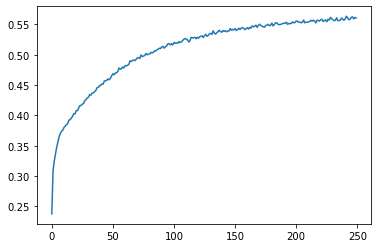

In [171]:
sns.lineplot(x=range(250),y=history_m.history['accuracy'])

<AxesSubplot:>

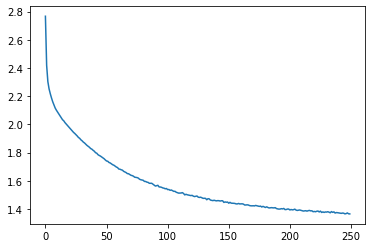

In [164]:
sns.lineplot(x=range(250),y=history_m.history['loss'])

In [31]:
#Helper function to generate unique names

def generate_name(num,gender):
    for i in range(num):
        temp_list=[]
        temp=np.zeros((1,12,27))
        for i in range(10):
            if(gender=="m"):
                output=model_m(temp)
            elif(gender=="f"):
                output=model(temp)
            char=np.random.choice(list(range(27)),p=np.array(output[0]))
            if(char==0):
                break
            else:
                temp_list.append(char)
                node=0
                temp=np.zeros((1,12,27))
                for i in range(12):
                    if(i+len(temp_list)>=12):
                        temp[0][i][temp_list[node]]=1
                        node=node+1
                    #print(i,node,len(temp_list),char)
        #print(temp)
        for i in temp_list:
            print(i_to_char[i],end="")
        print()
            

## Lets train female model 100 more epochs

In [215]:
history1=model.fit(x=input_,y=output,epochs=100,batch_size=128,verbose=2)

Epoch 1/100
170/170 - 6s - loss: 1.4341 - accuracy: 0.5398
Epoch 2/100
170/170 - 5s - loss: 1.4301 - accuracy: 0.5443
Epoch 3/100
170/170 - 4s - loss: 1.4288 - accuracy: 0.5438
Epoch 4/100
170/170 - 4s - loss: 1.4301 - accuracy: 0.5440
Epoch 5/100
170/170 - 4s - loss: 1.4268 - accuracy: 0.5450
Epoch 6/100
170/170 - 4s - loss: 1.4317 - accuracy: 0.5386
Epoch 7/100
170/170 - 4s - loss: 1.4231 - accuracy: 0.5464
Epoch 8/100
170/170 - 4s - loss: 1.4272 - accuracy: 0.5443
Epoch 9/100
170/170 - 4s - loss: 1.4233 - accuracy: 0.5459
Epoch 10/100
170/170 - 4s - loss: 1.4222 - accuracy: 0.5448
Epoch 11/100
170/170 - 4s - loss: 1.4226 - accuracy: 0.5444
Epoch 12/100
170/170 - 4s - loss: 1.4201 - accuracy: 0.5455
Epoch 13/100
170/170 - 4s - loss: 1.4205 - accuracy: 0.5458
Epoch 14/100
170/170 - 4s - loss: 1.4140 - accuracy: 0.5449
Epoch 15/100
170/170 - 4s - loss: 1.4147 - accuracy: 0.5481
Epoch 16/100
170/170 - 4s - loss: 1.4191 - accuracy: 0.5462
Epoch 17/100
170/170 - 4s - loss: 1.4100 - accura

<AxesSubplot:>

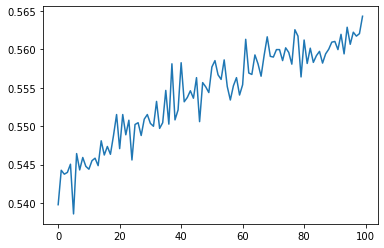

In [216]:
sns.lineplot(x=range(100),y=history1.history['accuracy'])

<AxesSubplot:>

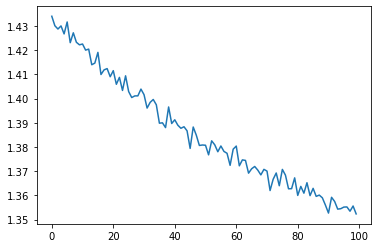

In [217]:
sns.lineplot(x=range(100),y=history1.history['loss'])

## Saving the male and female model for future use

In [174]:
model_m.save("Boy.h5")

In [ ]:
model.save("Girl_v3.h5")

## Loading the models

In [33]:
model=load_model("Girl_v3.h5")
model_m=load_model("Boy.h5")

## Generating Unique Names :)

To generate name we need to call generate_name() function it takes two arguments "num" and "Gender", num is the number of names we want to generate and for Gender (male or female), we can give "m" for male and "f" for female as argument


In [50]:
generate_name(10,"m")

ruchendra
jazuai
bhartendi
devasish
joir
lavthar
bhobhay
dolly
khamad
ghanshyam


In [42]:
generate_name(10,"f")

santosh
klashi
roopali
juber
adisha
durgannj
somwati
shtani
rushukla
saru


In [47]:
for i in corp:
    if(i=='rushukla\n'):
        print("yes")